In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

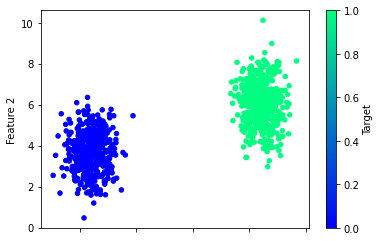

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
df.head()

,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1


In [6]:
X_Scaler = skl.preprocessing.StandardScaler()
X_Scaler.fit(X_train)
X_train_scaled = X_Scaler.transform(X_train)
X_test_scaled = X_Scaler.transform(X_test)

In [7]:
nn_model = tf.keras.models.Sequential()

In [9]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [10]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [11]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.7930 - accuracy: 0.1969
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7843 - accuracy: 0.2048
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7618 - accuracy: 0.2191
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7553 - accuracy: 0.2364
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7536 - accuracy: 0.2446
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7423 - accuracy: 0.2615
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7373 - accuracy: 0.2890
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7322 - accuracy: 0.3084
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7231 - accuracy: 0.2921
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7200 - accuracy: 0.3168
Epoch 11/

<AxesSubplot:>

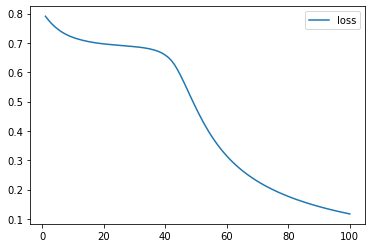

In [14]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

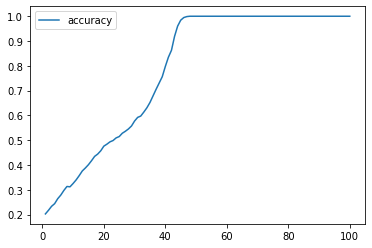

In [15]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [16]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1100 - accuracy: 1.0000
Loss: 0.11001454293727875, Accuracy: 1.0


In [18]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_Scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)